<center><h1>Laboratorio 2</h1></center>
<h1><center> PDS</h1></center>
<center><h2>Muestreo, Cuantificaciòn, Señales Anàlogas y Digitales<h2></center>
<center><h3>Cristian Stiven Osorio Tabares<h3></center>
<center><h3>c.c: 1040041942<h3></center>





# 1. Introducciòn
En este laboratorio se pretende afianzar los conceptos relacionados con muestreo y cuantificaciòn de señales. Para
ello se usaràn señales de audio que se van a re-muestrear y re-cuantificar.
En el Procesamiento digital de señales solo se pueden realizar operaciones aritmèticas con nùmeros en un rango
limitado. El muestreo consiste en tomar muestras de una señaal analògica a una frecuencia o tasa de muestreo
constante. Ademàs, se debe tener en cuenta el teorema de Nyquist.
La cuantificaciòn es el proceso de mapear valores de amplitud continua en un conjunto de valores contables. Puede
ser aplicado a señales anàlogas o a señales en tiempo discreto.

# 2. Muestreo


<h4> 1. Cargue la señal correspondiente al ultimo número de su cedula, grafique la señal y responda las siguientes preguntas:</h4>

In [12]:
from scipy.io.wavfile import read, write # Lerr y crear audios
from IPython.display import Audio # Muestra control de audio
import matplotlib.pyplot as plt # libreria usada para graficas
from scipy.signal import resample
import numpy as np #operaciones matematicas sobre arreglos
#import pylab

In [22]:
def graficar(t,signal,title):
    plt.figure(figsize=(30,4))
    plt.plot(t,signal,"orange") 
    plt.title(title,fontsize=25)
    plt.xlabel('Time',fontsize=18) 
    plt.ylabel('Amplitude',fontsize=18)
    plt.grid()
    plt.show()

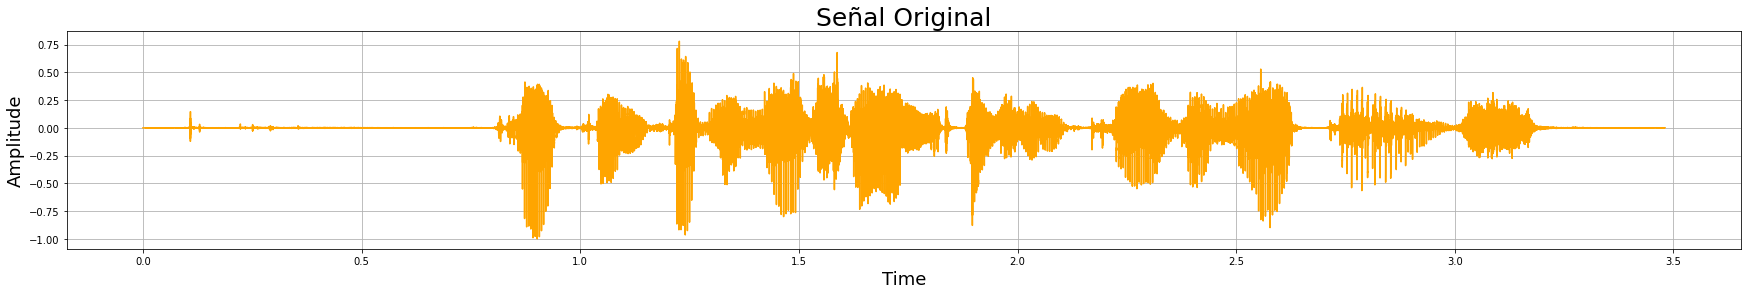

In [23]:
file_audio=('/content/drive/MyDrive/audio/0.wav')
fs,signal=read(file_audio)# Fs muestras por segundo
signal=signal/float(max(abs(signal))) # Escala la amplitud de la señal
t=np.arange(0, float(len(signal))/fs, 1.0/fs) # Vector de tiempo
#--Gráfica de la señal
graficar(t,signal,'Señal Original')
Audio(signal, rate=fs) 

<h4> 2. Genere un nuevo archivo de audio con la misma señal pero al doble y luego con la mitad de la frecuencia de
muestreo original. Escuche el audio, ¿qué diferencia nota? ¿A que se debe esto?</h4>

**Señal al doble de la frecuencia de muestro original**

In [15]:
write('0_fs2.wav',fs*2,signal)
fs2,signald2=read('0_fs2.wav')
Audio(signald2,rate=fs2)

**<center>Al aumentar la frecuencia se genera un audio con una duraciòn màs corta, la reproducciòn de este es acelerada y el tono de la voz de la persona se escucha mucho más agudo, por otro lado el contenido del audio se comprende y es transmitido completamente.</center>**

**Señal con la mitad de la frecuencia de muestro original**

In [16]:
write('0_fs3.wav',int(fs*0.5),signal)
fs3,signal3=read('0_fs3.wav')
Audio(signal3,rate=fs3)

**<center>Al disminuir la frecuencia se genera un audio con una duraciòn màs larga, la reproducciòn de este se ralentiza y el tono de la voz de la persona se escucha mucho más grave, por otro lado el contenido del audio se comprende.</center>**

<h4> 3. Sub-muestree la señal usando un tercio de la frecuencia de muestreo original. Reproduzca la señal resultante
y la original, ambas usando una frecuencia de fs/3. Grafique ambas señales en la misma figura. ¿Que puede
concluir?</h4>

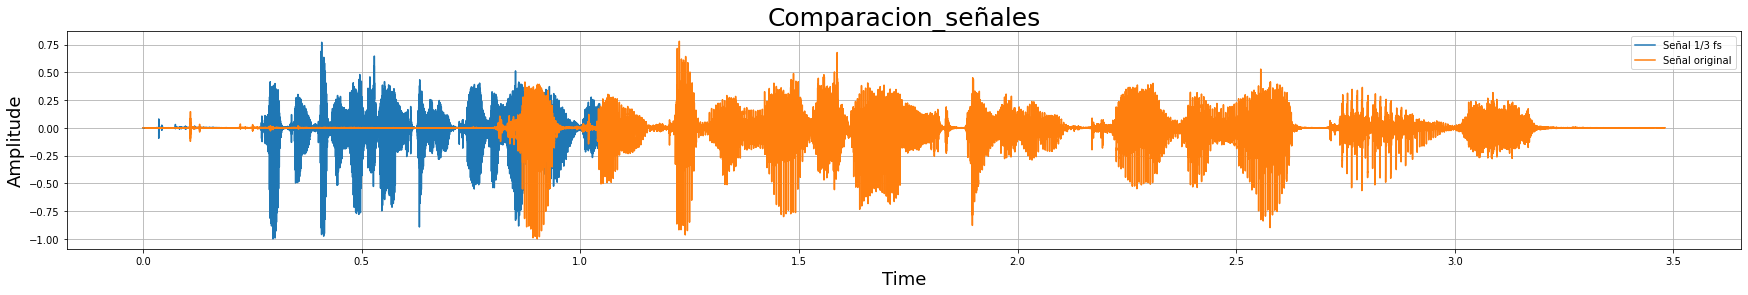

In [17]:
signal2 = resample(signal,int(len(signal)/3))
signal2 = signal2/float(max(abs(signal2)))# Escala la amplitud de la señal
t2=np.arange(0, float(len(signal2))/fs, 1.0/fs) # Vector de tiempo


write('0_fs4.wav',int(fs*0.33),signal)
fs4,signal4=read('0_fs4.wav')
signal4 = signal4/float(max(abs(signal4)))# Escala la amplitud de la señal
t4=np.arange(0, float(len(signal4))/fs, 1.0/fs) # Vector de tiempo
#--Gráfica de la señal
plt.figure(figsize=(30,4))
plt.plot(t2,signal2) 
plt.plot(t4,signal4)
plt.title('Comparacion_señales',fontsize=25)
plt.legend(["Señal 1/3 fs", "Señal original"])
plt.xlabel('Time',fontsize=18) 
plt.ylabel('Amplitude',fontsize=18)
plt.grid()
plt.show()
Audio(signal2, rate=int(fs*0.33))

**Audio de señal usando un tercio de la frecuencia de muestreo original**

In [18]:
Audio(signal4,rate=fs4)

**<center>Tanto en los 2 audios anteriores como en la grafica anterior, se puede evidenciar auditiva y visualmente el efecto de aumentar o disminuir la frecuencia de muestreo. Por otro lado usando un tercio de la frecuencia de muestro se ralentiza el audio, la voz se hace muy grave y se empieza a hacer inintelegible el contenido del audio. </center>**

# 3. Frecuencia de Nyquist y Alisiang

<h4> 1. Genere una señal sinusoidal con una frecuencia de 4 Hz y una frecuencia de muestreo de 80 Hz. Genere otra señal sinusoidal de frecuencia 4 Hz y muestrèela segùn el teorema de Nyquist. Grafique señales en la misma
figura. ¿Es posible recuperar la señal a partir de esta reconstrucciòn?</h4>


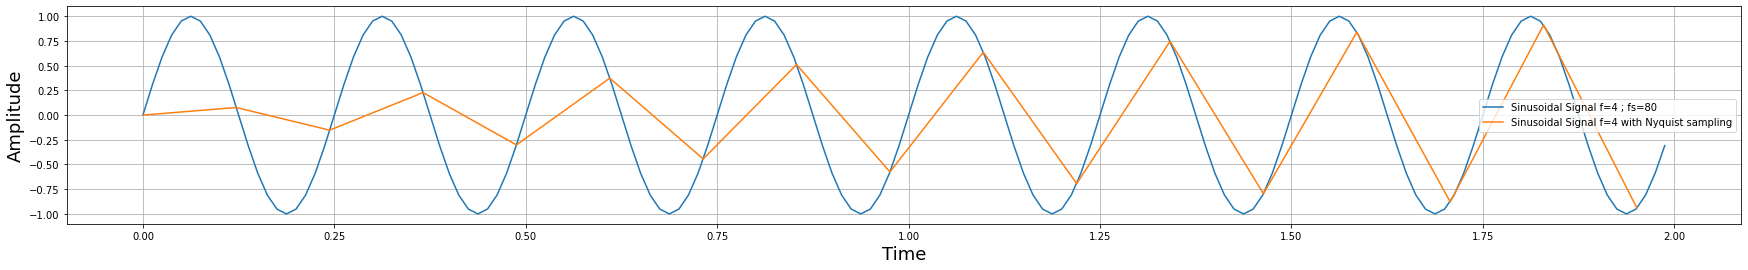

In [33]:
%matplotlib inline
f=4 # Frecuencia de la senal f=1/s , 
fs=80 # Frecuencia de muestreo
t=np.arange(0, 2.0, 1.0/fs) # Vector de tiempo
x = np.sin(2*np.pi*f*t)
# segun el teorema de Nyquist la fs debe ser : fs>= 2f = 8
fsn=8.2 # Frecuencia de muestreo, se incremente un 0.2 a (2f)
tn=np.arange(0, 2.0, 1.0/fsn) # Vector de tiempo
xn = np.sin(2*np.pi*f*tn)
plt.figure(figsize=(30,4))
plt.plot(t,x)
plt.plot(tn,xn)
plt.legend(["Sinusoidal Signal f=4 ; fs=80", "Sinusoidal Signal f=4 with Nyquist sampling"])
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.grid()
plt.show()

**<center> El proceso de muestreo es perfectamente reversible, esto es, su reconstrucción es exacta, no aproximada. Dicho de otro modo, desde el punto de vista matemático al que se refiere el teorema de muestreo de Nyquist-Shannon, la reconstrucción de una señal de 10 kHz es idéntica tanto si se obtiene de una tasa de muestreo de 25000 muestras por segundo como de una de 50000 muestras por segundo. </center>**
>Estoy citando mi conclusiòn de https://es.wikipedia.org/wiki/Frecuencia_de_muestreo

<h4> 2. Escriba un còdigo que genere dos señales sinusoidales muestreadas con una frecuencia fs = (n ∗ 11) − n Hz.
La señal 1 tendrà una frecuencia f1 = n Hz y la señal 2 tendrà una frecuencia f2 = n ∗ 11 Hz. Tome n como
ultimo dìgito de su cèdula). ¿Ambas señales quedan bien representadas. ¿ A que se debe esto?.</h4>

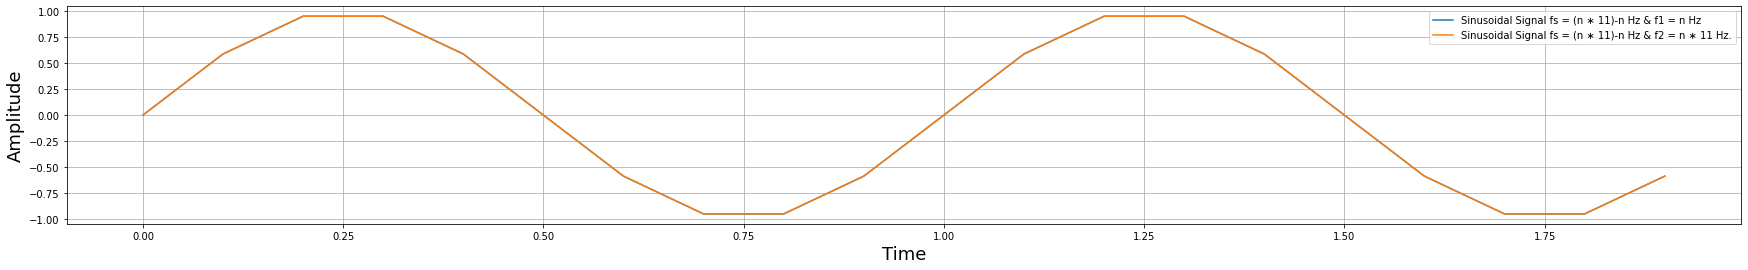

In [41]:
%matplotlib inline
n=0 # ultimo digito de mi cc es 0 pero para el ejercicio se harà n+1
f1=(n+1) # Frecuencia de la senal f1
f2=(n+1)*11 # Frecuencia de la senal f2
fs=((n+1)*11)-(n+1) # Frecuencia de muestreo
t1=np.arange(0, 2.0, 1.0/fs) # Vector de tiempo
x1 = np.sin(2*np.pi*f1*t1)
x2 = np.sin(2*np.pi*f2*t1)
plt.figure(figsize=(30,4))
plt.plot(t1,x1)
plt.plot(t1,x2)
plt.legend(["Sinusoidal Signal fs = (n ∗ 11)-n Hz & f1 = n Hz", "Sinusoidal Signal fs = (n ∗ 11)-n Hz & f2 = n ∗ 11 Hz."])
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.grid()
plt.show()

**<center> Ambas señales han quedado superpuestas, por ende la frecuencia no generò una diferencia graficamente  </center>**

# 4. Cuantificaciòn


<h4> 1. Use la funciòn mostrada a continuaciòn para Re-cuantizar la señal de audio utilizada en los numerales anteriores a 2, 4 y 12 bits. Escuche y grafique las señales re-cuantificadas. Compare gràficamente las señales
re-cuantificadas con la señal original. ¿Que pudo notar?</h4>


In [42]:
def fxquant (s,bit):
    # s: senal de entrada , debe estar normalizada entre -1 y 1
    # bit: bits de cuantizacion
    Plus1 =np.power (2, (bit -1)) #Se obtiene el tamaño de la señal elevando 2 al número de bits menos 1
    X=s* Plus1 #La señal se multiplica por el número de bits
    X=np.round (X) #Se redondea
    
    #Se obtienen el mínimo y máximo de la señal
    X=np.minimum (Plus1 -1.0 ,X) 
    X=np.maximum ( -1.0* Plus1 ,X)
    
    #Luego la señal se divide para obtener el nivel requerido
    X=X/Plus1
    return X

In [43]:
fs,signal=read('/content/drive/MyDrive/audio/0.wav')
signal=signal/float(max(abs(signal)))
signalq2b=fxquant(signal,2)
tq2b=np.arange(0, float(len(signalq2b))/fs, 1.0/fs) # Vector de tiempo
# Recuantizada a 2 bit
Audio(signalq2b,rate=fs)

In [44]:
signalq4b=fxquant(signal,4)
tq4b=np.arange(0, float(len(signalq4b))/fs, 1.0/fs) # Vector de tiempo
# Recuantizada a 4 bit
Audio(signalq4b,rate=fs)

In [50]:
signalq12b=fxquant(signal,12)
tq12b=np.arange(0, float(len(signalq12b))/fs, 1.0/fs) # Vector de tiempo
# Recuantizada a 12 bit
Audio(signalq12b,rate=fs)

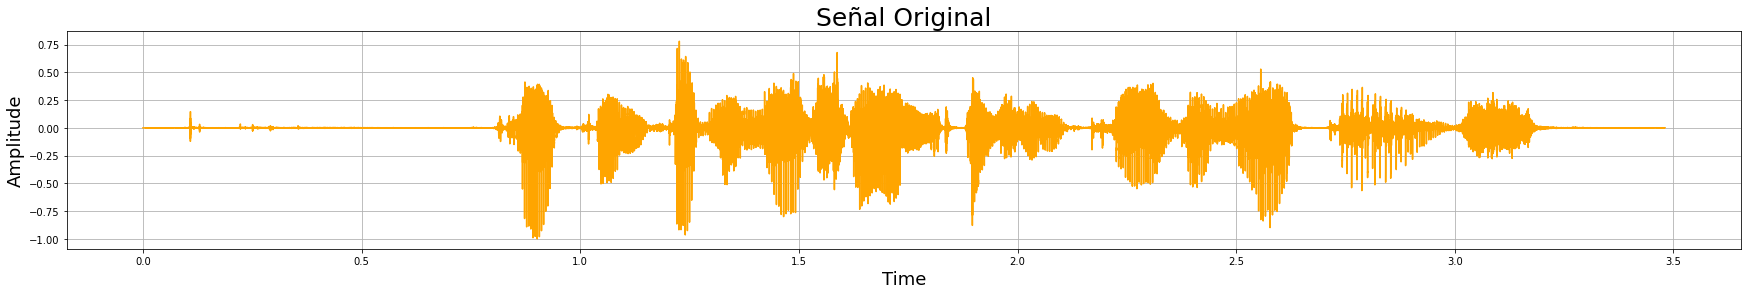

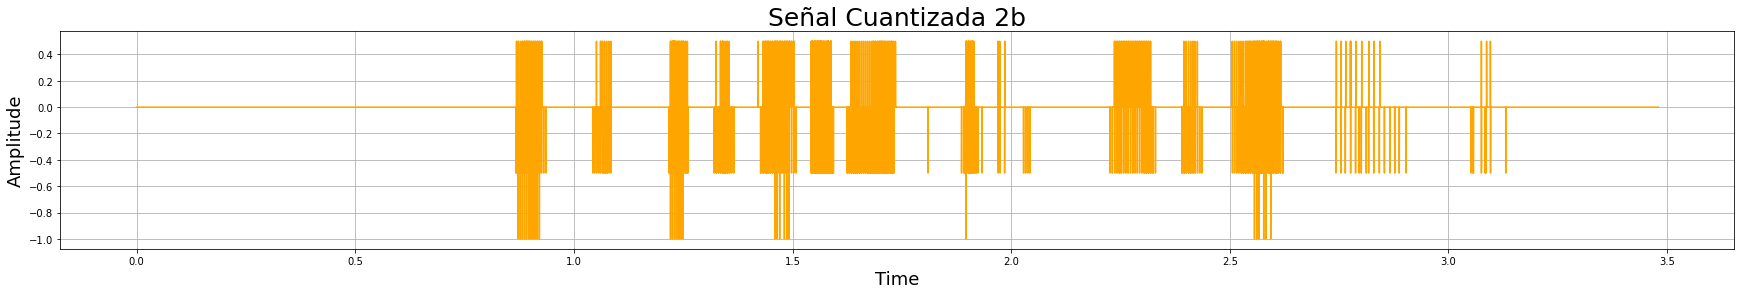

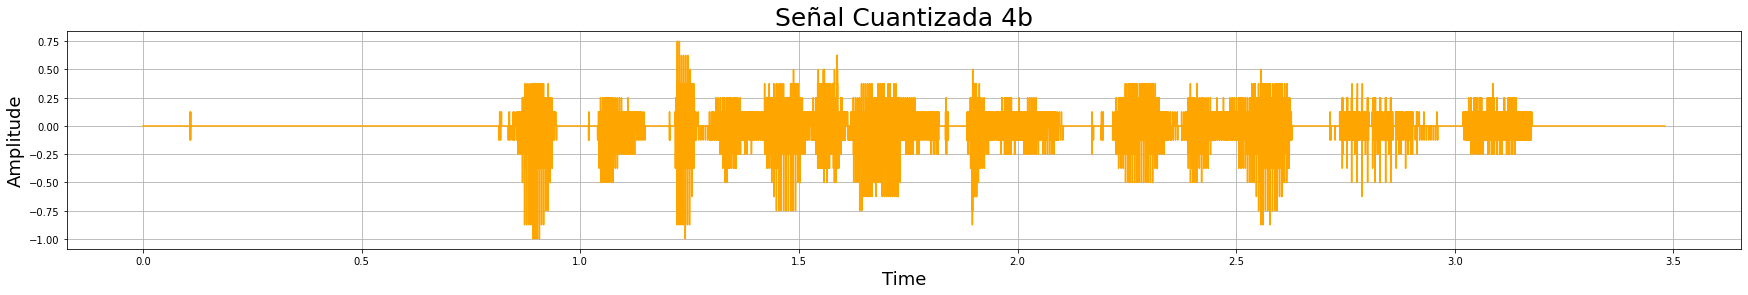

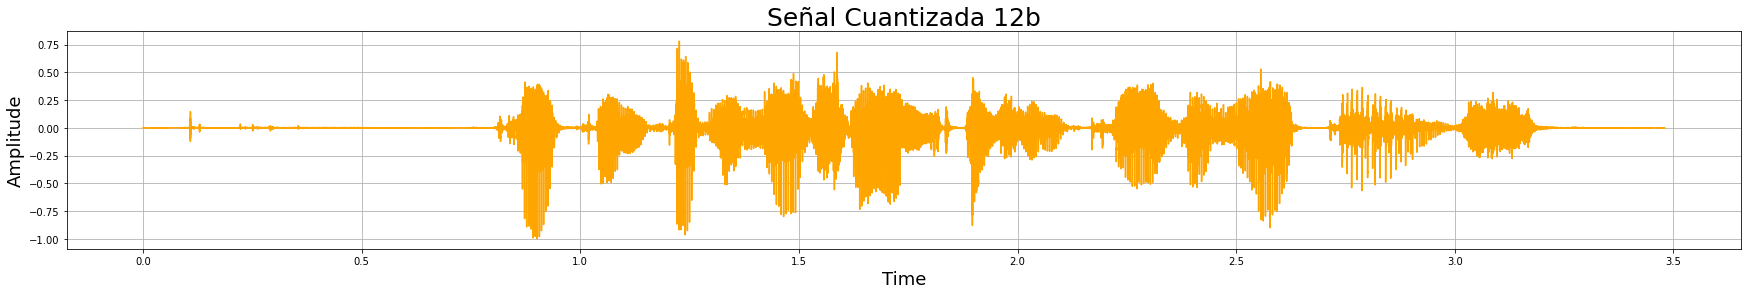

In [53]:
t=np.arange(0, float(len(signal))/fs, 1.0/fs) # Vector de tiempo
graficar(t,signal,'Señal Original')
graficar(tq2b,signalq2b,'Señal Cuantizada 2b')
graficar(tq4b,signalq4b,'Señal Cuantizada 4b')
graficar(tq12b,signalq12b,'Señal Cuantizada 12b')

**<center> Se puede apreciar tanto auditiva como graficamente la diferencia en la calidad del audio a medida que se incrementa la cantidad de bits. Esto puede ser ùtil si lo que se busca es tener un audio de alta calidad, sin embargo si se trata de usar un menor ancho de banda se podrìa buscar reducir la cantidad de bits y encontrar un equilibrio entre calidad del audio y ancho de banda a usar. </center>**

# 5. Transmisiòn Analògica Vs. digital


<h4>5.1. Generaciòn de señales analògica y digital</h4>

1. Cargue la señal de audio correspondiente al ultimo nùmero de su cèdula.

In [54]:
file_audio=('/content/drive/MyDrive/audio/0.wav')
fs,signal=read(file_audio)# Fs muestras por segundo
signal=signal/float(max(abs(signal))) # Escala la amplitud de la señal
t=np.arange(0, float(len(signal))/fs, 1.0/fs) # Vector de tiempo
Audio(signal, rate=fs) 

<h4> 2. Para obtener la señal analògica, normalice el audio en amplitud y luego re-escale en un factor de 460. Use el siguiente còdigo ayuda. x ∗ norm es la señal normalizada y sA es la señal analògica resultante. </h4>

In [68]:
norm=1.0/np.max(np.abs(x))
sA=460.0*x*norm

<h4> 3. La señal digital se obtiene aproximando cada punto de la señal analògica a un valor discreto que generalmente
es un entero. Use la funciòn round() de la librerìa numpy para aproximar la señal analògica y obtener la señal
digital.</h4> 

In [70]:
np.round_(sA, decimals=0, out=None)

array([   0.,  142.,  270.,  372.,  437.,  460.,  437.,  372.,  270.,
        142.,    0., -142., -270., -372., -437., -460., -437., -372.,
       -270., -142.,   -0.,  142.,  270.,  372.,  437.,  460.,  437.,
        372.,  270.,  142.,    0., -142., -270., -372., -437., -460.,
       -437., -372., -270., -142.,   -0.,  142.,  270.,  372.,  437.,
        460.,  437.,  372.,  270.,  142.,    0., -142., -270., -372.,
       -437., -460., -437., -372., -270., -142.,   -0.,  142.,  270.,
        372.,  437.,  460.,  437.,  372.,  270.,  142.,    0., -142.,
       -270., -372., -437., -460., -437., -372., -270., -142.,   -0.,
        142.,  270.,  372.,  437.,  460.,  437.,  372.,  270.,  142.,
          0., -142., -270., -372., -437., -460., -437., -372., -270.,
       -142.,   -0.,  142.,  270.,  372.,  437.,  460.,  437.,  372.,
        270.,  142.,    0., -142., -270., -372., -437., -460., -437.,
       -372., -270., -142.,   -0.,  142.,  270.,  372.,  437.,  460.,
        437.,  372.,